# Regression
lecture1 ~ lecture3까지의 내용을 종합하여 Regression 실습  
강의에서 사용했던 house price vs size 에 대한 dataset을 만든 후  
`matplotlib & seaborn`을 사용하여 그래프로 나타내고  `sklearn` 모듈을 이용하여 fitting 및 모델 평가 진행.

# dataset 생성

In [28]:
# fix seaborn style 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

In [122]:
# 50개의 data를 만들고 정규분포를 이용하여 random한 값을 생성
# random seed 고정하여 값을 고정시킴
np.random.seed(0)
size = np.linspace(10, 60, 50) + np.random.rand(50) * 10
price = np.linspace(1000, 5000, 50) + np.random.randint(0, 50, 50)
data = pd.DataFrame({'size' : size, 'price' : price})
data.head()

,size,price
0,15.488135,1042.000000
1,18.172302,1101.632653
2,18.068450,1174.265306
3,18.510056,1248.897959
4,18.318181,1332.530612


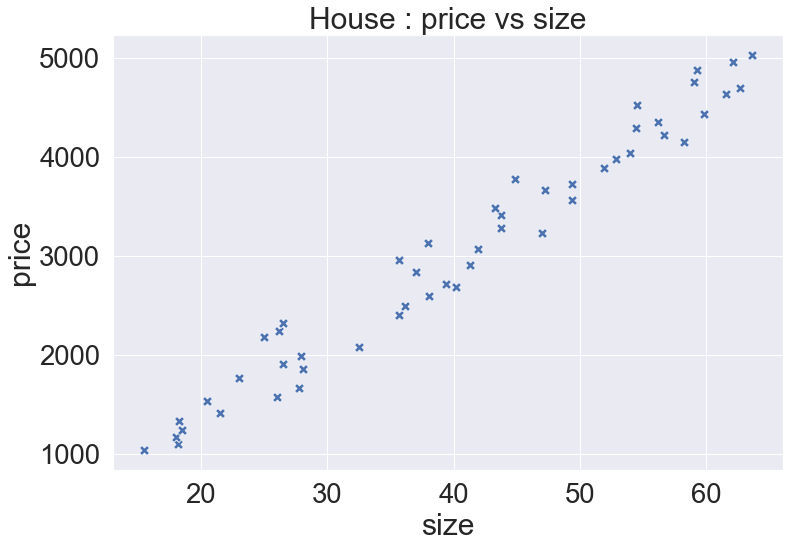

In [123]:
# data 그래프
plt.figure(figsize=(12, 8))
sns.scatterplot(x='size', y='price', data=data, marker='X', s=100)
plt.title('House : price vs size')
plt.show()

In [124]:
# sklearn의 LinearRegression을 이용하여 fitting
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data.drop('price', axis=1)
Y = data['price']
train_X, test_X, train_Y, test_Y = train_test_split(X, Y)

In [131]:
model = LinearRegression()
model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)

theta0 = model.intercept_
theta1 = model.coef_

hypothesis = theta0 + theta1 * X
print(theta0, theta1)

-251.22895895440433 [80.9479739]


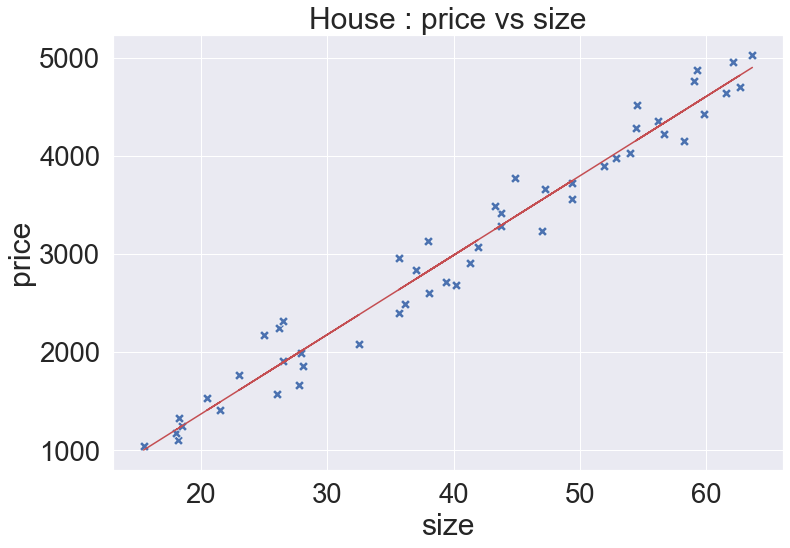

In [126]:
# 생성된 linear와 house 그래프를 같은 figure에 생성
plt.figure(figsize=(12, 8))
sns.scatterplot(x='size', y='price', data=data, marker='X', s=100)
plt.plot(X, hypothesis, 'r')
plt.title('House : price vs size')
plt.show()